In [1]:
from PattRecClasses import HMM_TA 
import scipy.stats
from matplotlib import pyplot as plt
# For the code to work you might have to pip install scipy

from CharacterFeatureExtractor import featureExtractor
from DrawCharacter import DrawCharacter

import numpy as np

import pandas as pd


# Load in data

In [9]:
### data prep
db_name = "database_inc_sampchar"
data = pd.read_pickle(r'data/'+db_name+'.cdb')
data_features = pd.read_pickle(r'data/'+db_name+'_features.cdb')
data_labels = pd.read_pickle(r'data/'+db_name+'_labels.cdb')
data_sampchar = pd.read_pickle(r'data/'+db_name+'_sampchar.cdb')

# data_features[k][r] == np.array (ndim, t); K (number of letters) of R samples with Tr individual lengths
print("Characters loaded in:",data_labels)


### To keep in mind in the future:
# obsTA = np.array([ hm_learn.rand(100)[0] for _ in range(10) ])
# print(type(obsTA))
# print(obsTA[1].shape) == (100,2)
# Our data has format (2,15) ! Transpose all datapoints
##### TEST WITH THIS LATER!
#for i in range(len(obs)):
#    obs[i] = np.transpose(obs[i])


Characters loaded in: ['A', 'C', 'K', 'P', 'X']


# Data visualization

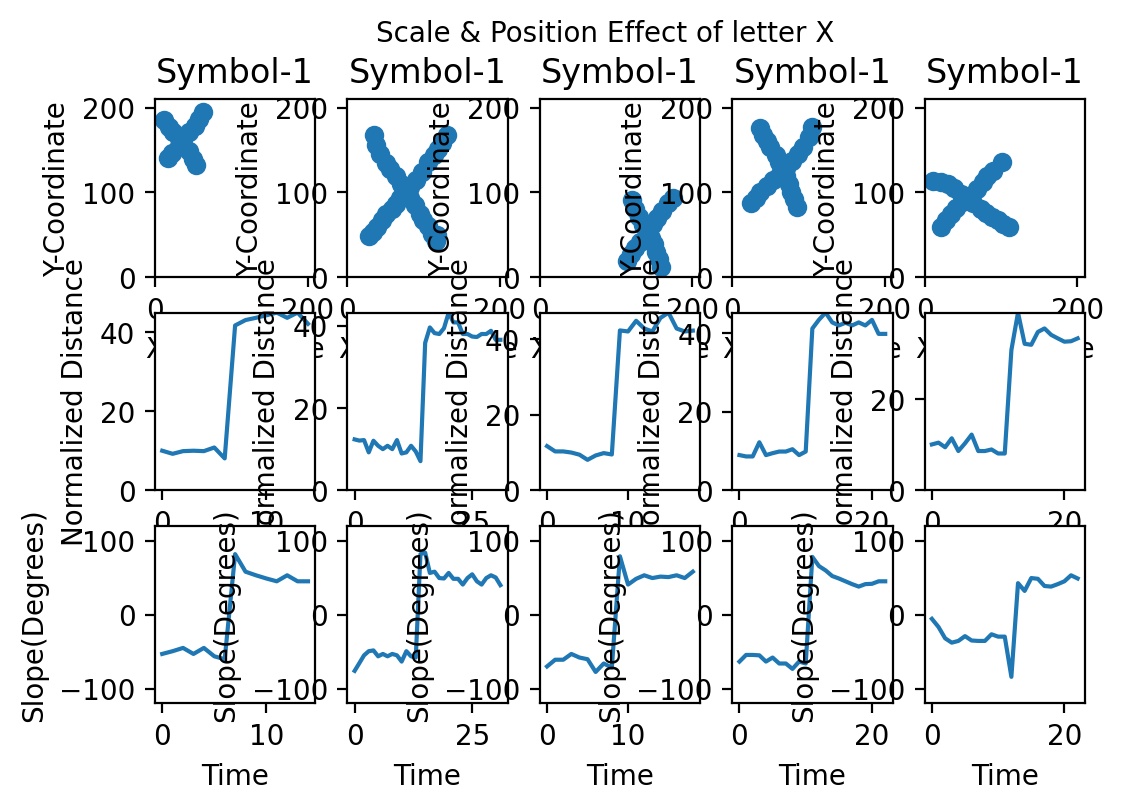

'\n\n'

In [15]:
char = 4  # which character in the label list we are using
obs = data_features[char]
raw_obs = data[char]
sampchar = data_sampchar[char]

plt_num = 5  # number of samples plotted
f, axarr = plt.subplots(3, plt_num, dpi = 200)
f.suptitle('Scale & Position Effect of letter '+data_labels[char], fontsize=10)

for i in range(plt_num):

    feature_symbol1 = obs[i]
    sampled_symbol1 = sampchar[i]

    # normalized distance ,slope, and t for symbol-1
    f1_symbol1 = feature_symbol1[0]
    f2_symbol1 = feature_symbol1[1]
    t1 = np.array(range(0,feature_symbol1.shape[1]))
    
    # mean and number of states required:
    # killgissa?
    
    #------------- SYMBOL DRAWINGS
    #Drawing of sampled symbol-1
    axarr[0, i].scatter(sampled_symbol1[0], sampled_symbol1[1])
    axarr[0, i].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
    axarr[0, i].set_title('Symbol-1')
    axarr[0, i].set_xlim([0,210])
    axarr[0, i].set_ylim([0,210])

    #------------- ABSOLUTE DISTANCE FEATURE
    #Absolute distance plot of symbol-1
    axarr[1, i].plot(t1, f1_symbol1)
    axarr[1, i].set(xlabel = "Time", ylabel = "Normalized Distance")
    axarr[1, i].set_ylim([0,np.max(f1_symbol1)])

    #------------- SLOPE FEATURE
    #Y-wise distance plot of symbol-1
    axarr[2, i].plot(t1, f2_symbol1)
    axarr[2, i].set(xlabel = "Time", ylabel = "Slope(Degrees)")
    axarr[2, i].set_ylim([-120,120])

plt.show()

""" Observed results:
X: 2 states, 
f1s1mean=10
f1s2mean=45
f2s1mean=-60
f2s2mean=70
"""